<a href="https://colab.research.google.com/github/Hossain-Younis/BuzzOff/blob/main/Buzzoff_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import os
from IPython.display import Image
from IPython.display import display
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
import tensorflow as tf
from tf_keras.utils import to_categorical
from tf_keras.utils import plot_model
from tf_keras.preprocessing.image import ImageDataGenerator
from tf_keras.models import Sequential
from tf_keras.layers import Add, Activation, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tf_keras.layers import GlobalAveragePooling2D, BatchNormalization, AveragePooling2D
from tf_keras.layers import BatchNormalization
from tf_keras.models import Model
from tf_keras.optimizers import Adam
from tf_keras.callbacks import EarlyStopping
from tf_keras.callbacks import ReduceLROnPlateau
from tf_keras.regularizers import l2
from tf_keras.models import load_model

Processing the Dataset

In [ ]:
# Setting up the directory to the identification folder
species_dir = "/content/drive/MyDrive/Buzzoff/Identification Dataset"

# Initializing the lists to store the image and data
species_images = []
species_labels = []

# Looping through all the species subdirectories inside the Buzzoff directory
for species_subfolder in os.listdir(species_dir):
    species_subfolder_path = os.path.join(species_dir, species_subfolder)

    # Checking if the subfolder exists
    if os.path.isdir(species_subfolder_path):

        # Looping through all the images inside the species subdirectory
        for image_file in os.listdir(species_subfolder_path):
            image_file_path = os.path.join(species_subfolder_path, image_file)

            # Checking if the files are JPG, JPEG or PNG files
            if image_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                # Reading the images
                image = cv2.imread(image_file_path, 0)

                # Resizing the images to 64x64 pixels
                image = cv2.resize(image, (64, 64))

                # Converting the images to a numpy array
                image = np.array(image) / 255.0

                # Appending the images to the list
                species_images.append(image)

                # Extracting labels from the basefolder and appending to the list
                labels = os.path.basename(species_subfolder_path)
                species_labels.append(labels)

# Converting the lists to numpy arrays
species_images = np.array(species_images)
species_labels = np.array(species_labels)

# Encoding the labels as integers for one-hot encoding
label_encoder = LabelEncoder()
species_labels_encoded = label_encoder.fit_transform(species_labels)

# One-Hot Encoding the labels
species_labels_one_hot = to_categorical(species_labels_encoded)

# Splitting the dataset into training and testing sets
X_species_train, X_species_test, y_species_train, y_species_test = train_test_split(species_images,
                                                    species_labels_one_hot,
                                                    test_size=0.2, random_state=42)

# Saving the numpy arrays
saving_dir = "/content/drive/MyDrive/Buzzoff"
np.save(os.path.join(saving_dir, "X_species_train.npy"), X_species_train)
np.save(os.path.join(saving_dir, "X_species_test.npy"), X_species_test)
np.save(os.path.join(saving_dir, "y_species_train.npy"), y_species_train)
np.save(os.path.join(saving_dir, "y_species_test.npy"), y_species_test)

Visualizing the Training Dataset

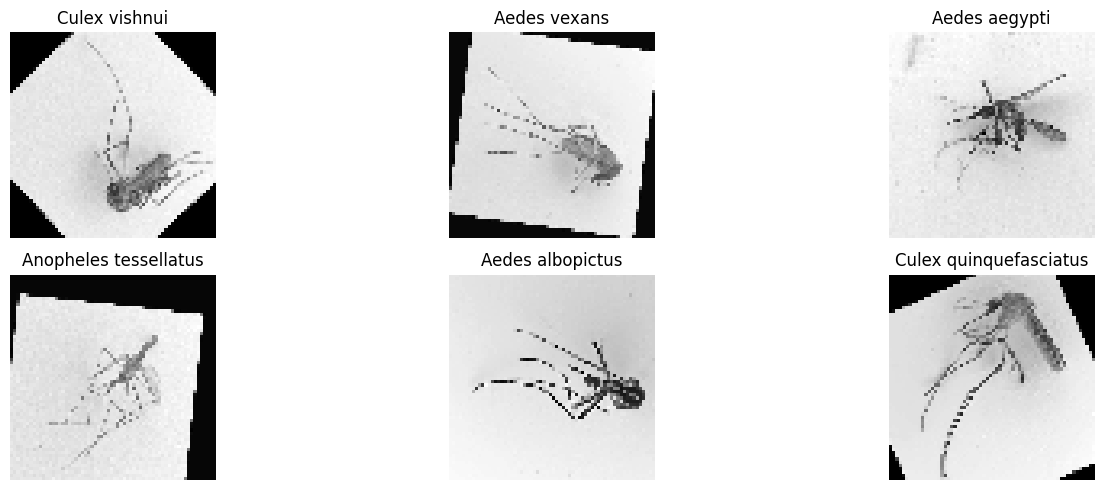

In [ ]:
# Visualizing one sample from each distinct label from the training arrays
# Loading the training numpy arrays
X_train = np.load("/content/drive/MyDrive/Buzzoff/X_species_train.npy")
y_train = np.load("/content/drive/MyDrive/Buzzoff/y_species_train.npy")

# Decoding the labels to original labels
species_labels_encoded = np.argmax(y_train, axis=1)  # Reversing one-hot encoding to get original integer labels
species_labels = label_encoder.inverse_transform(species_labels_encoded)  # Decoding to original string labels

# Creating a dictionary to store one sample per label
samples_per_label = {}

# Finding one sample per label
for i in range(X_train.shape[0]):
    label = species_labels[i]
    if label not in samples_per_label:
        samples_per_label[label] = X_train[i]

# Plotting the samples
num_labels = len(samples_per_label)

# Defining the grid dimensions
nrows = 2
ncolumns = 3

# Creating the figure and subplots
fig, axes = plt.subplots(nrows, ncolumns, figsize=(15, 5))

# Flattening the axes
axes = axes.flatten()

# Plotting the samples (in grayscale)
for ax, (label, sample) in zip(axes, samples_per_label.items()):
    ax.imshow(sample, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

# Hiding any unused subplots (if there are fewer labels than subplots)
for ax in axes[num_labels:]:
    ax.axis('off')

# Adjusting the layout
plt.tight_layout()

# Displaying the images with labels
plt.show()

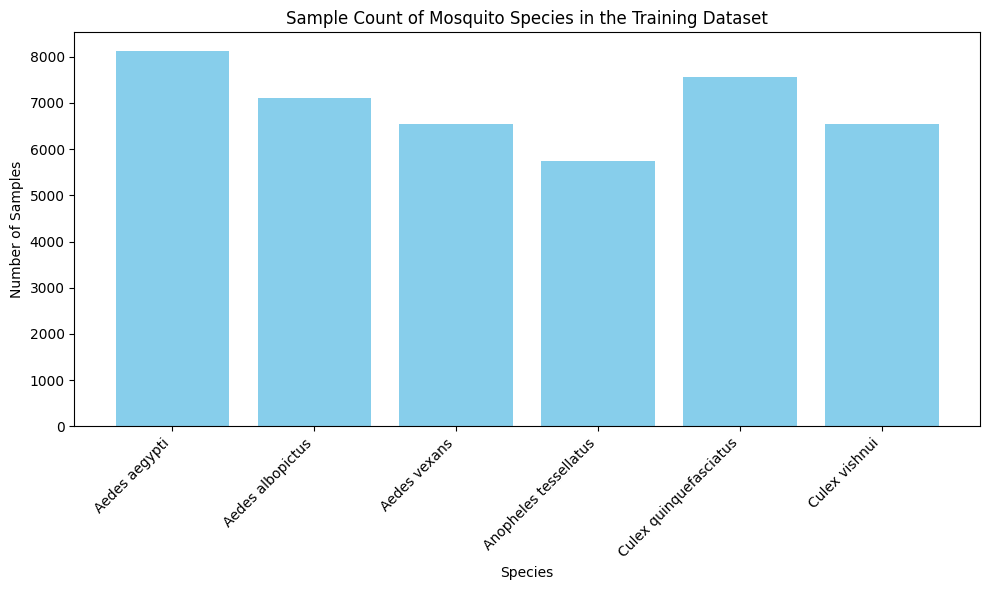

In [ ]:
# Creating a barchart from the training arrays
# Loading the training numpy arrays
X_train = np.load("/content/drive/MyDrive/Buzzoff/X_species_train.npy")
y_train = np.load("/content/drive/MyDrive/Buzzoff/y_species_train.npy")

# Decoding the labels to original labels
species_labels_encoded = np.argmax(y_train, axis=1)  # Reversing one-hot encoding to get original integer labels
species_labels = label_encoder.inverse_transform(species_labels_encoded)  # Decoding to original string labels

# Count occurrences of each label
unique_labels, label_counts = np.unique(species_labels, return_counts=True)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the bar chart
ax.bar(unique_labels, label_counts, color="skyblue")

# Setting the title and labels
ax.set_title('Sample Count of Mosquito Species in the Training Dataset')
ax.set_xlabel('Species')
ax.set_ylabel('Number of Samples')

# Setting the x-tick labels
ax.set_xticks(range(len(unique_labels)))
ax.set_xticklabels(unique_labels, rotation=45, ha="right")

# Displaying the bar chart
plt.tight_layout()
plt.show()

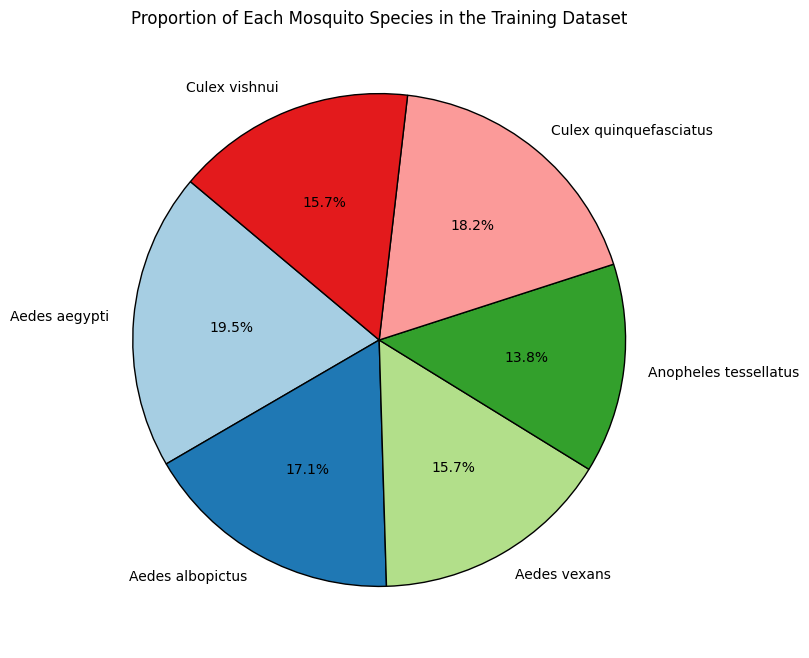

In [ ]:
# Creating a piechart from the trainning samples
# loading the training numpy arrays
X_train = np.load("/content/drive/MyDrive/Buzzoff/X_species_train.npy")
y_train = np.load("/content/drive/MyDrive/Buzzoff/y_species_train.npy")

# Decoding the labels to original labels
species_labels_encoded = np.argmax(y_train, axis=1)  # Reversing one-hot encoding to get original integer labels
species_labels = label_encoder.inverse_transform(species_labels_encoded)  # Decoding to original string labels

# counting occurrences of each label
unique_labels, label_counts = np.unique(species_labels, return_counts=True)

# plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 8))

# creating the pie chart
ax.pie(label_counts, labels=unique_labels, autopct='%1.1f%%',
       colors=plt.cm.Paired(range(len(unique_labels))),
       startangle=140, wedgeprops={'edgecolor': 'black'})

# adding title
ax.set_title('Proportion of Each Mosquito Species in the Training Dataset')

# plotting the plot
plt.show()

Visualizing the Testing Dataset

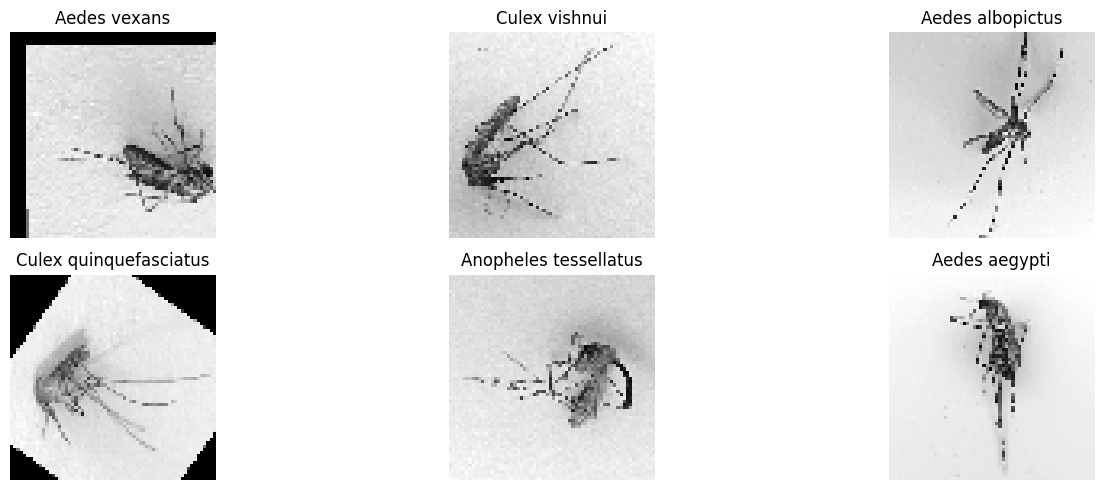

In [ ]:
# Visualizing one sample from each unique labels in the testing array
# Loading the testing numpy arrays
X_test = np.load("/content/drive/MyDrive/Buzzoff/X_species_test.npy")
y_test = np.load("/content/drive/MyDrive/Buzzoff/y_species_test.npy")

# Decoding the labels to original labels
species_labels_encoded_test = np.argmax(y_test, axis=1)  # Reversing one-hot encoding to get original integer labels
species_labels_test = label_encoder.inverse_transform(species_labels_encoded_test)  # Decoding to original string labels

# Creating a dictionary to store one sample per label from the testing set
samples_per_label_test = {}

# Finding one sample per label
for i in range(X_test.shape[0]):
    label = species_labels_test[i]
    if label not in samples_per_label_test:
        samples_per_label_test[label] = X_test[i]

# Plotting the samples
num_labels_test = len(samples_per_label_test)

# Defining the grid dimensions (using the same layout as for training)
nrows = 2
ncolumns = 3

# Creating the figure and subplots
fig, axes = plt.subplots(nrows, ncolumns, figsize=(15, 5))

# Flattening the axes
axes = axes.flatten()

# Plotting the samples (in grayscale)
for ax, (label, sample) in zip(axes, samples_per_label_test.items()):
    ax.imshow(sample, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

# Hiding any unused subplots (if there are fewer labels than subplots)
for ax in axes[num_labels_test:]:
    ax.axis('off')

# Adjusting the layout
plt.tight_layout()

# Displaying the images with labels
plt.show()

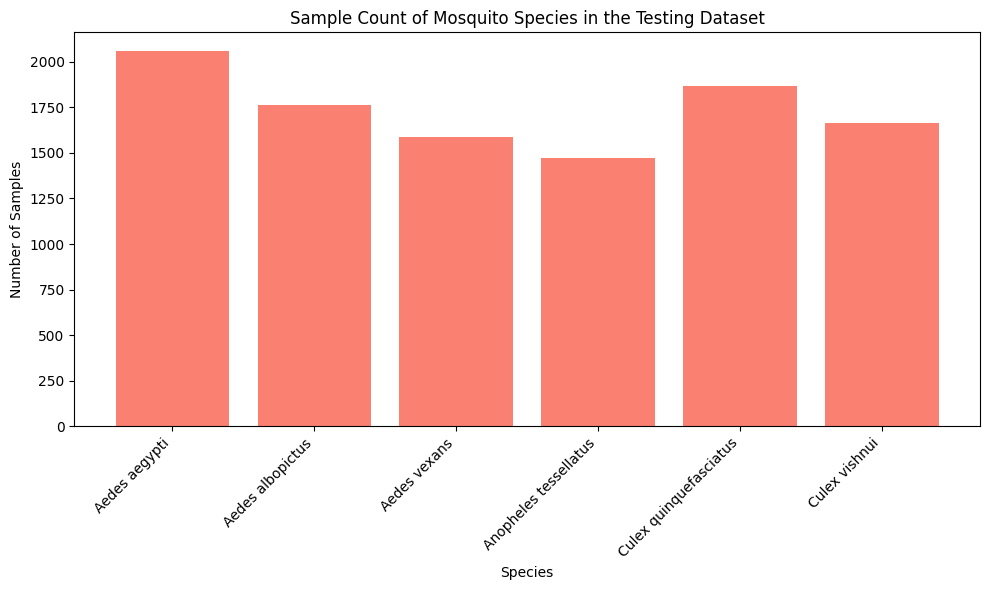

In [ ]:
# Creating a barchart from testing array
# Loading the testing numpy arrays
X_test = np.load("/content/drive/MyDrive/Buzzoff/X_species_test.npy")
y_test = np.load("/content/drive/MyDrive/Buzzoff/y_species_test.npy")

# Decoding the labels to original labels
species_labels_encoded_test = np.argmax(y_test, axis=1)  # Reversing one-hot encoding to get original integer labels
species_labels_test = label_encoder.inverse_transform(species_labels_encoded_test)  # Decoding to original string labels

# Count occurrences of each label in the testing dataset
unique_labels_test, label_counts_test = np.unique(species_labels_test, return_counts=True)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the bar chart
ax.bar(unique_labels_test, label_counts_test, color="salmon")

# Setting the title and labels
ax.set_title('Sample Count of Mosquito Species in the Testing Dataset')
ax.set_xlabel('Species')
ax.set_ylabel('Number of Samples')

# Setting the x-tick labels
ax.set_xticks(range(len(unique_labels_test)))
ax.set_xticklabels(unique_labels_test, rotation=45, ha="right")

# Displaying the bar chart
plt.tight_layout()
plt.show()

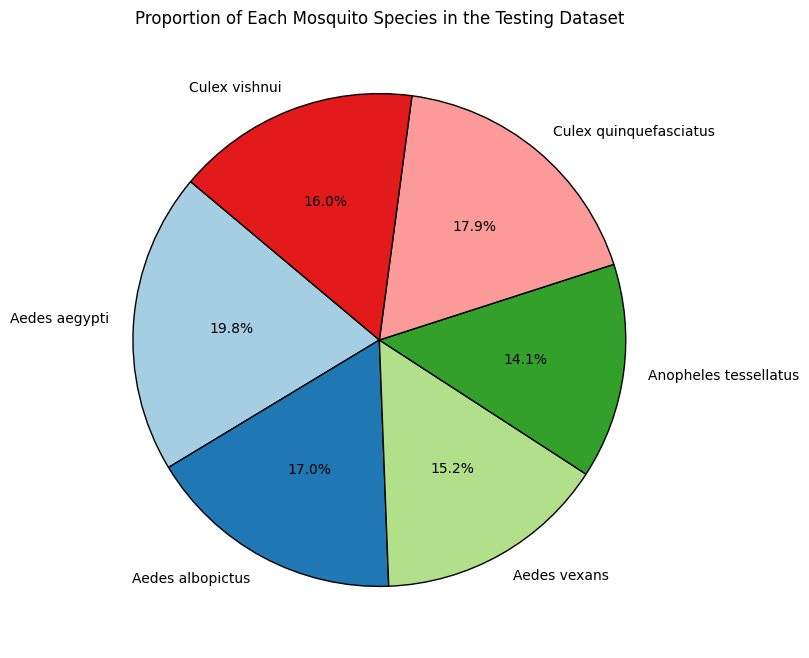

In [ ]:
# Creating a piechart from the testing samples
# Loading the testing numpy arrays
X_test = np.load("/content/drive/MyDrive/Buzzoff/X_species_test.npy")
y_test = np.load("/content/drive/MyDrive/Buzzoff/y_species_test.npy")

# Decoding the labels to original labels
species_labels_encoded_test = np.argmax(y_test, axis=1)  # Reversing one-hot encoding to get original integer labels
species_labels_test = label_encoder.inverse_transform(species_labels_encoded_test)  # Decoding to original string labels

# Counting occurrences of each label in the testing dataset
unique_labels_test, label_counts_test = np.unique(species_labels_test, return_counts=True)

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(10, 8))

# Creating the pie chart
ax.pie(label_counts_test, labels=unique_labels_test, autopct='%1.1f%%',
       colors=plt.cm.Paired(range(len(unique_labels_test))),
       startangle=140, wedgeprops={'edgecolor': 'black'})

# Adding title
ax.set_title('Proportion of Each Mosquito Species in the Testing Dataset')

# Displaying the plot
plt.show()

Model Architecture

In [ ]:
# Creating the identification model
# Defining the function for ResNet architecture
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Creating the input layer of the identification model
inputs = Input(shape=(64, 64, 1))

# Initial Convolution layer
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=2, padding='same')(x)

# Resnet blocks
x = residual_block(x, 256)
x = residual_block(x, 256)
x = residual_block(x, 512, stride=2)
x = residual_block(x, 512)
x = residual_block(x, 1024, stride=2)
x = residual_block(x, 1024)

# Global average pooling
x = GlobalAveragePooling2D()(x)

# Fully connected layers
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# Output layer
outputs = Dense(6, activation='softmax')(x)

# Creating the identification model
identification_model = Model(inputs=inputs, outputs=outputs)

# Displaying model summary
identification_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 64)           3200      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 32, 64)           0         ['batch_normalization[0][0

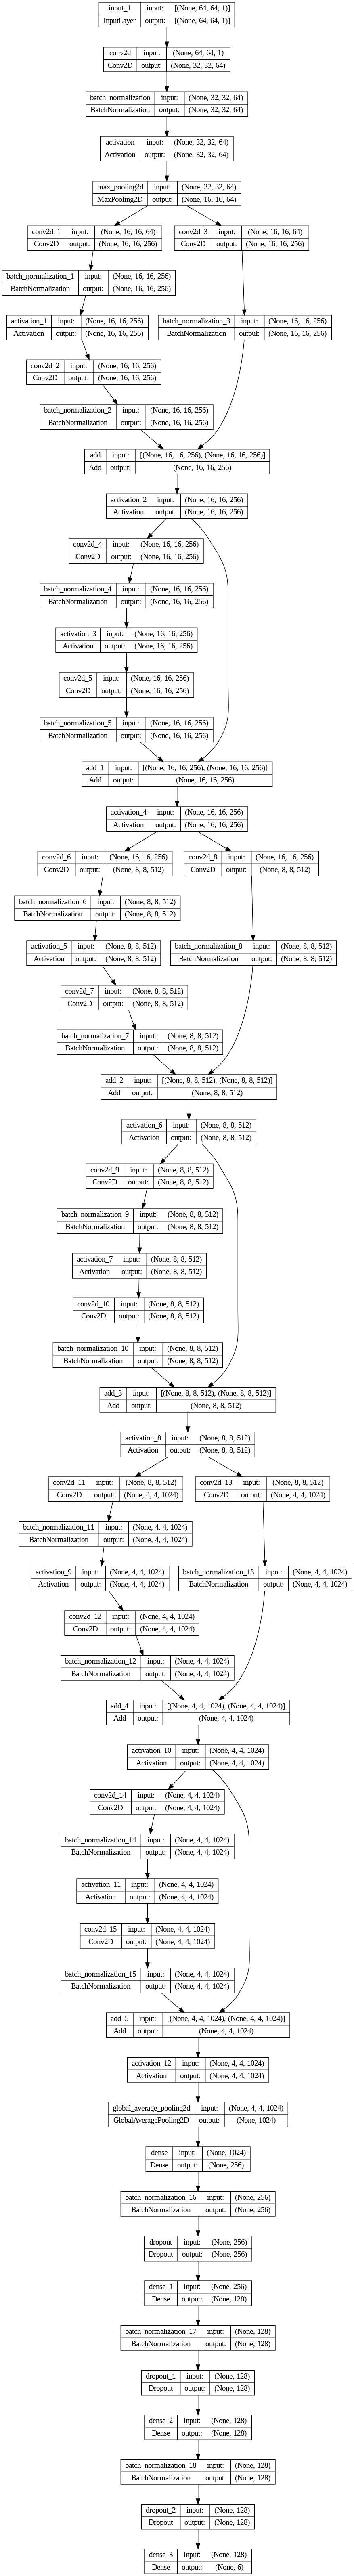

In [ ]:
# Creating a box plot with jitter
# Generating the model architecture plot
# Generating the model architecture plot
plot_model(identification_model, to_file='/content/drive/MyDrive/Buzzoff/identification_model.png', show_shapes=True, show_layer_names=True)

# Displaying the image of the model
display(Image('/content/drive/MyDrive/Buzzoff/identification_model.png'))

In [ ]:
# Compiling the identification model
identification_model.compile(optimizer=Adam(learning_rate=0.0001),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

Training the model and evaluating it

In [ ]:
# Training the model
# Loading the processed trainning data
X_train = np.load("/content/drive/MyDrive/Buzzoff/X_species_train.npy")
y_train = np.load("/content/drive/MyDrive/Buzzoff/y_species_train.npy")

# Converting the numpy arrays to tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int64)

# Trainning the identification model
identification_model.fit(X_train_tensor, y_train_tensor,
                                epochs=35, batch_size=32,)

Epoch 1/35
1302/1302 [==============================] - 150s 102ms/step - loss: 1.7632 - accuracy: 0.3290
Epoch 2/35
1302/1302 [==============================] - 135s 104ms/step - loss: 1.4201 - accuracy: 0.4463
Epoch 3/35
1302/1302 [==============================] - 135s 104ms/step - loss: 1.1566 - accuracy: 0.5620
Epoch 4/35
1302/1302 [==============================] - 135s 104ms/step - loss: 0.9167 - accuracy: 0.6599
Epoch 5/35
1302/1302 [==============================] - 135s 103ms/step - loss: 0.7364 - accuracy: 0.7336
Epoch 6/35
1302/1302 [==============================] - 134s 103ms/step - loss: 0.6023 - accuracy: 0.7852
Epoch 7/35
1302/1302 [==============================] - 134s 103ms/step - loss: 0.4771 - accuracy: 0.8310
Epoch 8/35
1302/1302 [==============================] - 135s 103ms/step - loss: 0.3825 - accuracy: 0.8668
Epoch 9/35
1302/1302 [==============================] - 135s 103ms/step - loss: 0.3054 - accuracy: 0.8964
Epoch 10/35
1302/1302 [=======================

In [ ]:
# Testing the trained identification model
# Loading the processed testing data
X_test = np.load("/content/drive/MyDrive/Buzzoff/X_species_test.npy")
y_test = np.load("/content/drive/MyDrive/Buzzoff/y_species_test.npy")

# Converting the numpy arrays to tensors
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int64)

# Evaluating the identification model
evaluation_results = identification_model.evaluate(X_test_tensor, y_test_tensor)

# Extracting the loss and accuracy from the evaluated model
loss = evaluation_results[0]
accuracy = evaluation_results[1]

# Printing the loss and accuracy
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Predicting with the identification model
predictions = identification_model.predict(X_test_tensor)

# Converting the prediction to label indices
predicted_labels = np.argmax(predictions, axis=1)

# Converting y_test_tensor to numpy for evaluation metrics
y_test_labels = np.argmax(y_test_tensor, axis=1)  # one-hot encoded labels to integer labels

# Calculating the recall, precision, and F1 score
recall = recall_score(y_test_labels, predicted_labels, average='weighted')
precision = precision_score(y_test_labels, predicted_labels, average='weighted')
f1 = f1_score(y_test_labels, predicted_labels, average='weighted')

# Printing the recall, precision, and F1 score
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

326/326 [==============================] - 10s 28ms/step - loss: 0.8054 - accuracy: 0.8161
Loss: 0.80544114112854
Accuracy: 0.8160775899887085
326/326 [==============================] - 9s 26ms/step
Recall: 0.8160776027660391
Precision: 0.820955313568397
F1 Score: 0.8162619966249126


Visualization of the test results

326/326 [==============================] - 8s 25ms/step


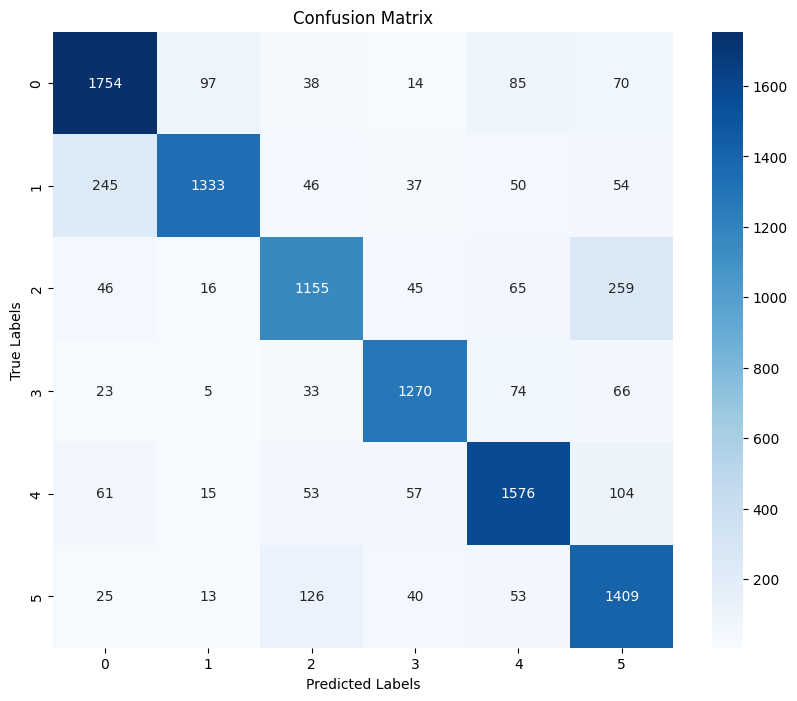

In [ ]:
# Creating a Confusion Matrix
# Loading the processed testing data
X_test = np.load("/content/drive/MyDrive/Buzzoff/X_species_test.npy")
y_test = np.load("/content/drive/MyDrive/Buzzoff/y_species_test.npy")

# Converting the numpy arrays to tensors
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int64)

# Evaluating the identification model
evaluation_results = identification_model.evaluate(X_test_tensor, y_test_tensor)

# Extracting the loss and accuracy from the evaluated model
loss = evaluation_results[0]
accuracy = evaluation_results[1]

# Predicting with the identification model
predictions = identification_model.predict(X_test_tensor)

# Converting the prediction to label indices
predicted_labels = np.argmax(predictions, axis=1)

# Converting true labels to indices
true_labels = np.argmax(y_test, axis=1)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting the confusion matrix with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

326/326 [==============================] - 8s 24ms/step


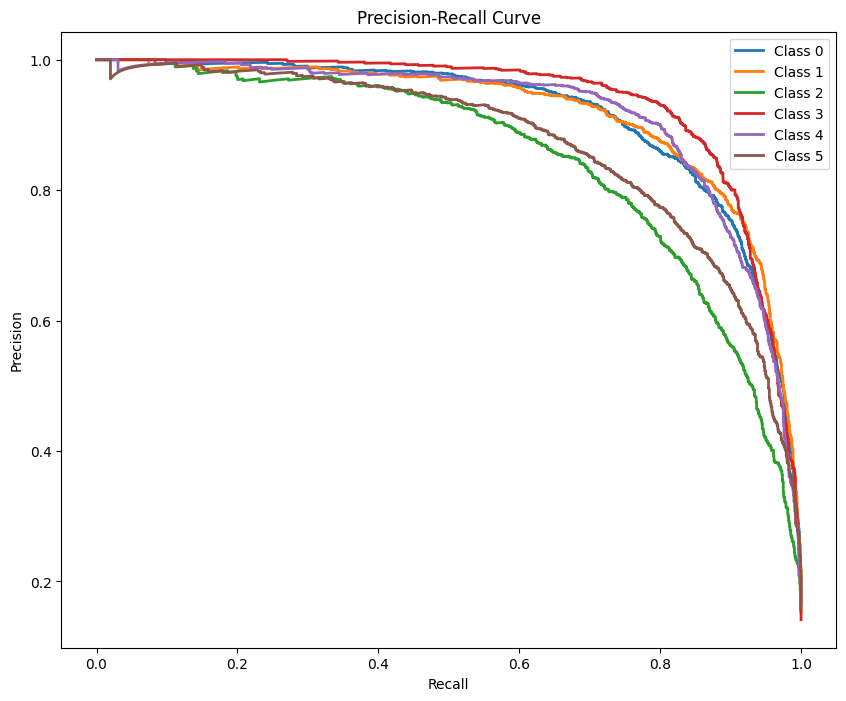

In [ ]:
# Loading the processed testing data
X_test = np.load("/content/drive/MyDrive/Buzzoff/X_species_test.npy")
y_test = np.load("/content/drive/MyDrive/Buzzoff/y_species_test.npy")

# Converting the numpy arrays to tensors
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int64)

# Evaluating the identification model
evaluation_results = identification_model.evaluate(X_test_tensor, y_test_tensor)

# Extracting the loss and accuracy from the evaluated model
loss = evaluation_results[0]
accuracy = evaluation_results[1]

# Predicting with the identification model
predictions = identification_model.predict(X_test_tensor)

# Converting true labels to a binary format (one-hot encoded)
true_labels = y_test

# Getting the precision and recall values for each class
precision = dict()
recall = dict()
for i in range(true_labels.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(true_labels[:, i], predictions[:, i])

# Plotting the precision-recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(true_labels.shape[1]):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

Saving the model

In [ ]:
# Saving the model in .keras and .h5 format
identification_model.save("/content/drive/MyDrive/Buzzoff/identification_model.keras")
identification_model.save("/content/drive/MyDrive/Buzzoff/identification_model.h5")

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
